In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
df = pd.read_parquet('./Data/draft1322')
df

Draft_Yr  Rnd   Pick   Tm          Player Pos   Age      To  \
0       2013.0  1.0    1.0  KAN     Eric Fisher  OL  22.0  2021.0   
1       2013.0  1.0    2.0  JAX    Luke Joeckel  OL  21.0  2017.0   
2       2013.0  1.0    3.0  MIA     Dion Jordan  DE  23.0  2020.0   
3       2013.0  1.0    4.0  PHI    Lane Johnson  OL  23.0  2022.0   
4       2013.0  1.0    5.0  DET   Ezekiel Ansah  DE  24.0  2020.0   
...        ...  ...    ...  ...             ...  ..   ...     ...   
2553    2022.0  0.0  258.0  GNB    Samori Toure  WR  24.0  2022.0   
2554    2022.0  0.0  259.0  KAN  Nazeeh Johnson   S  24.0  2022.0   
2555    2022.0  0.0  260.0  LAC  Zander Horvath  RB  23.0  2022.0   
2556    2022.0  0.0  261.0  LAR       AJ Arcuri  OL  25.0  2022.0   
2557    2022.0  0.0  262.0  SFO     Brock Purdy  QB  22.0  2022.0   

               College          Player_NFL_Link  \
0     Central Michigan  /players/F/FishEr00.htm   
1            Texas A&M  /players/J/JoecLu00.htm   
2               Oregon  /players/J/JordDi00.htm   
3             Oklahoma  /players/J/JohnLa01.htm   
4                  BYU  /players/A/AnsaEz00.htm   
...                ...                      ...   
2553          Nebraska  /players/T/TourSa00.htm   
2554          Marshall  /players/J/JohnNa01.htm   
2555            Purdue  /players/H/HorvZa00.htm   
2556      Michigan St.  /players/A/ArcuAJ00.htm   
2557          Iowa St.  /players/P/PurdBr00.htm   

                                       Player_NCAA_Link  tackles_solo  \
0                                                  None           NaN   
1     http://www.sports-reference.com/cfb/players/lu...           1.0   
2     http://www.sports-reference.com/cfb/players/di...          73.0   
3     http://www.sports-reference.com/cfb/players/la...           1.0   
4     http://www.sports-reference.com/cfb/players/ez...          39.0   
...                                                 ...           ...   
2553  http://www.sports-reference.com/cfb/players/sa...           NaN   
2554  http://www.sports-reference.com/cfb/players/na...         177.0   
2555  http://www.sports-reference.com/cfb/players/al...           NaN   
2556  http://www.sports-reference.com/cfb/players/aj...           NaN   
2557  http://www.sports-reference.com/cfb/players/br...           NaN   

      tackles_assists  tackles_total  tackles_loss  sacks  def_int  \
0                 NaN            NaN           NaN    NaN      NaN   
1                 0.0            1.0           0.0    0.0      NaN   
2                48.0          121.0          29.0   14.5      NaN   
3                 0.0            1.0           0.0    0.0      NaN   
4                33.0           72.0          13.0    4.5      1.0   
...               ...            ...           ...    ...      ...   
2553              NaN            NaN           NaN    NaN      NaN   
2554            125.0          302.0           6.0    1.0      7.0   
2555              NaN            NaN           NaN    NaN      NaN   
2556              NaN            NaN           NaN    NaN      NaN   
2557              NaN            NaN           NaN    NaN      NaN   

      def_int_yds  def_int_yds_per_int  def_int_td  pass_defended  \
0             NaN                  NaN         NaN            NaN   
1             NaN                  NaN         NaN            0.0   
2             NaN                  NaN         NaN            2.0   
3             NaN                  NaN         NaN            0.0   
4            -2.0                 -2.0         0.0            1.0   
...           ...                  ...         ...            ...   
2553          NaN                  NaN         NaN            NaN   
2554         63.0                  9.0         1.0           19.0   
2555          NaN                  NaN         NaN            NaN   
2556          NaN                  NaN         NaN            NaN   
2557          NaN                  NaN         NaN            NaN   

      fumbles_rec

In [5]:
first = df[df.Rnd == 1]
other = df[df.Rnd != 1]

In [6]:
first_pos = pd.DataFrame(first.Pos.value_counts()).reset_index()
first_conf = pd.DataFrame(first.college_conference.value_counts()).reset_index()

In [7]:
other_pos = pd.DataFrame(other.Pos.value_counts()).reset_index()
other_conf = pd.DataFrame(other.college_conference.value_counts()).reset_index()

In [8]:
first_pos.columns=['f_pos','f_pos_Count']
first_conf.columns=['f_conf','f_conf_Count']
other_pos.columns=['o_pos','o_pos_Count']
other_conf.columns=['o_conf','o_conf_Count']

In [9]:
first_pos_cols = []
missing_pos_cols = []
for x in first_pos.f_pos:
    first_pos_cols.append(x)
for y in other_pos.o_pos:
    if y not in first_pos_cols:
        missing_pos_cols.append(y)

first_conf_cols = []
missing_conf_cols = []
for a in first_conf.f_conf:
    first_conf_cols.append(a)
for b in other_conf.o_conf:
    if b not in first_conf_cols:
        missing_conf_cols.append(b)

In [10]:
add_pos = pd.DataFrame({'f_pos': missing_pos_cols,
              'f_pos_Count': [0,0,0,0]})

In [11]:
zero = []
for i in range(len(missing_conf_cols)):
    zero.append(0)

In [12]:
add_conf = pd.DataFrame({'f_conf': missing_conf_cols,
                        'f_conf_Count': zero})

In [13]:
first_pos = pd.concat([first_pos,add_pos]).reset_index().drop(['index'],axis=1)
first_conf = pd.concat([first_conf,add_conf]).reset_index().drop(['index'],axis=1)

In [14]:
com_pos = first_pos.merge(other_pos,left_on='f_pos',right_on='o_pos',indicator='outer')
com_conf = first_conf.merge(other_conf,left_on='f_conf',right_on='o_conf',indicator='outer')

In [15]:
com_pos.drop(['outer'],axis=1,inplace=True)
com_conf.drop(['outer'],axis=1,inplace=True)

In [16]:
com_pos['ratio'] = com_pos.f_pos_Count / (com_pos.f_pos_Count + com_pos.o_pos_Count)
com_conf['ratio'] = com_conf.f_conf_Count / (com_conf.f_conf_Count + com_conf.o_conf_Count)

In [17]:
com_pos.sort_values(by='ratio',ascending=False)

f_pos  f_pos_Count o_pos  o_pos_Count     ratio
4     QB           30    QB           83  0.265487
0     OL           63    OL          363  0.147887
3     DE           31    DE          192  0.139013
6     DT           26    DT          165  0.136126
5     CB           28    CB          182  0.133333
7     DB           23    DB          150  0.132948
1     WR           42    WR          277  0.131661
2     LB           40    LB          280  0.125000
11    DL            3    DL           24  0.111111
9      S           12     S          126  0.086957
10    TE            9    TE          135  0.062500
8     RB           12    RB          203  0.055814
12     P            0     P           20  0.000000
13     K            0     K           17  0.000000
14    FB            0    FB           14  0.000000
15    LS            0    LS            8  0.000000

In [41]:
conf_graph = com_conf.sort_values(by='ratio',ascending=False).head(14)
conf_graph['ratio'] = conf_graph.ratio * 100
conf_graph

f_conf  f_conf_Count  \
0               Southeastern Conference            99   
6                           Independent            10   
1             Atlantic Coast Conference            51   
3             Pacific Twelve Conference            43   
2                    Big Ten Conference            46   
12     Southwestern Athletic Conference             1   
5          American Athletic Conference            13   
4                 Big Twelve Conference            19   
10  Missouri Valley Football Conference             3   
13                  Southern Conference             1   
11                             Big East             1   
7               Mid-American Conference             4   
8              Mountain West Conference             4   
9                        Conference USA             3   

                                 o_conf  o_conf_Count      ratio  
0               Southeastern Conference           422  19.001919  
6                           Independent            50  16.666667  
1             Atlantic Coast Conference           267  16.037736  
3             Pacific Twelve Conference           246  14.878893  
2                    Big Ten Conference           302  13.218391  
12     Southwestern Athletic Conference             7  12.500000  
5          American Athletic Conference           110  10.569106  
4                 Big Twelve Conference           174   9.844560  
10  Missouri Valley Football Conference            28   9.677419  
13                  Southern Conference            11   8.333333  
11                             Big East            13   7.142857  
7               Mid-American Conference            57   6.557377  
8              Mountain West Conference            80   4.761905  
9                        Conference USA            72   4.000000

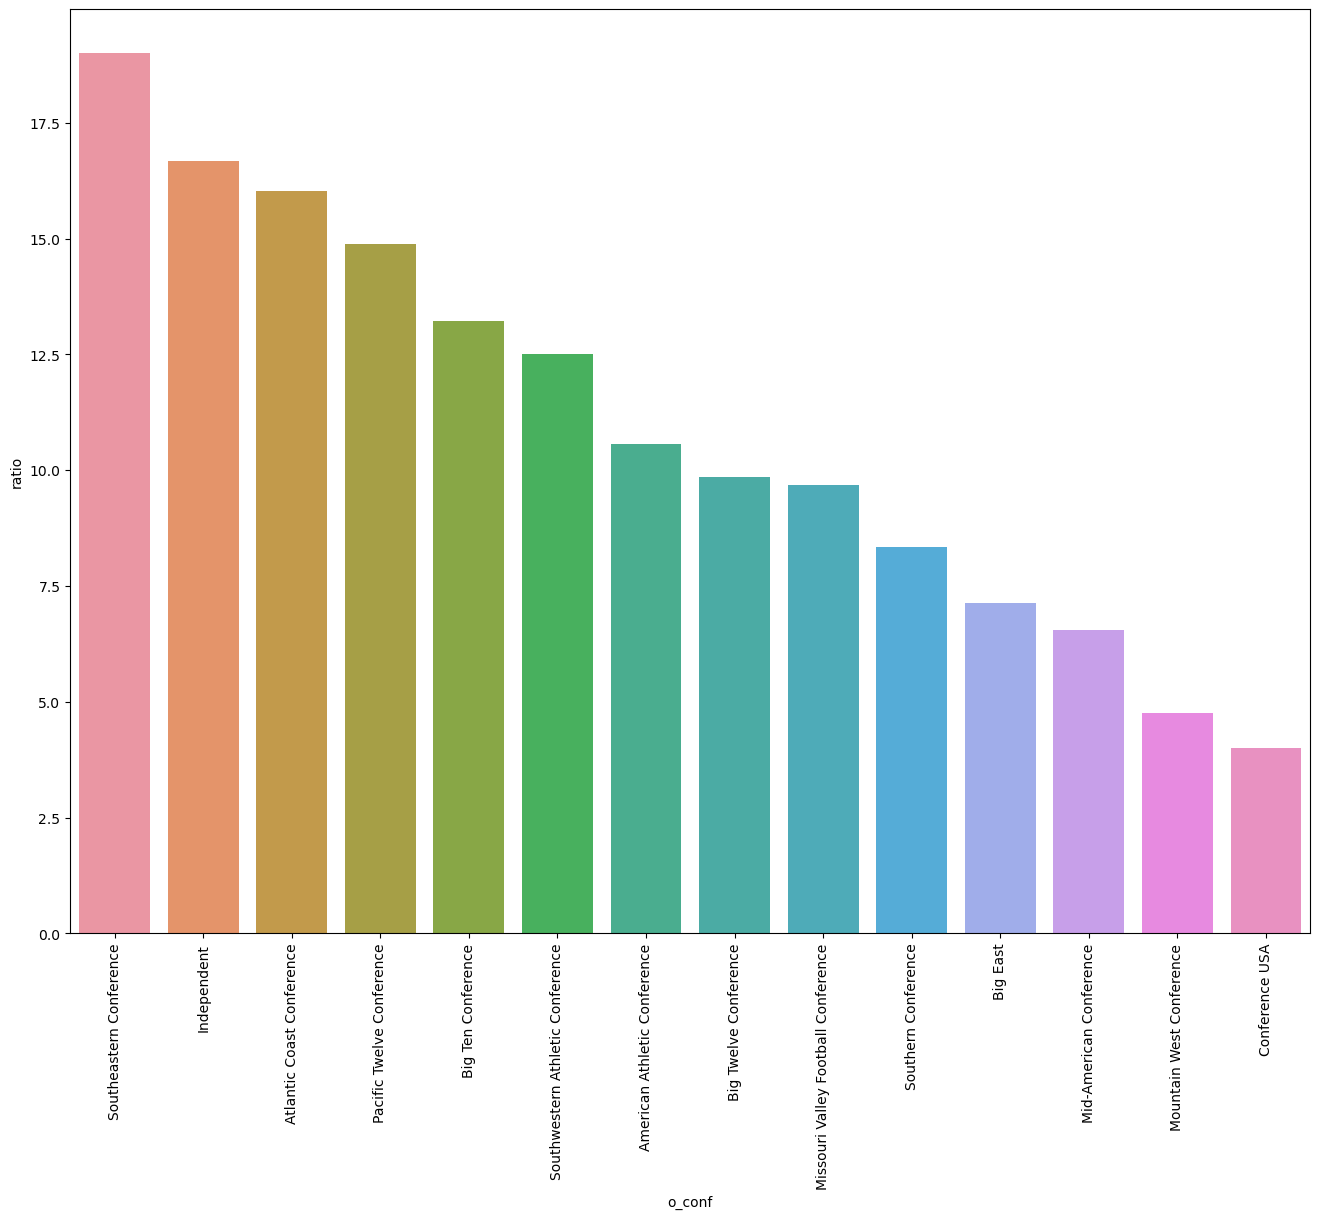

In [47]:
plt.figure(figsize=(16,12))
sns.barplot(x=conf_graph.o_conf,y=conf_graph.ratio)
plt.tick_params(axis='x',rotation = 90);

In [19]:
qb = df[df.Pos == 'QB']
ol = df[df.Pos == 'OL']
de = df[df.Pos == 'DE']
dt = df[df.Pos == 'DT']
cb = df[df.Pos == 'CB']
db = df[df.Pos == 'DB']
wr = df[df.Pos == 'WR']

In [20]:
qb.columns

Index(['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced',
       'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'pass_cmp', 'pass_att', 'pass_cmp_pct',
       'pass_yds', 'pass_yds_per_att', 'adj_pass_yds_per_att', 'pass_td',
       'pass_int', 'pass_rating', 'display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number'],
      dtype='object')

In [21]:
qb = qb[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'pass_cmp', 'pass_att', 'pass_cmp_pct',
       'pass_yds', 'pass_yds_per_att', 'adj_pass_yds_per_att', 'pass_td',
       'pass_int', 'pass_rating', 'display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [22]:
ol = ol[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [23]:
de = de[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

dt = dt[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

cb = cb[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

db = db[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'tackles_solo',
       'tackles_assists', 'tackles_total', 'tackles_loss', 'sacks', 'def_int',
       'def_int_yds', 'def_int_yds_per_int', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [24]:
wr = wr[['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'Player_NFL_Link', 'Player_NCAA_Link', 'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td','display_name', 'position_group', 'height',
       'weight', 'entry_year', 'college_conference', 'draft_number']]

In [25]:
ol.groupby(['Rnd','college_conference']).count()

Draft_Yr  Pick  Tm  \
Rnd college_conference                                                     
0.0 American Athletic Conference                            13    13  13   
    Atlantic Coast Conference                               38    38  38   
    Big Sky Conference                                       3     3   3   
    Big Ten Conference                                      54    54  54   
    Big Twelve Conference                                   30    30  30   
    Colonial Athletic Association                            3     3   3   
    Conference USA                                           7     7   7   
    Great Northwest Athletic Conference                      1     1   1   
    Independent                                              6     6   6   
    Ivy League                                               2     2   2   
    Liberty League                                           1     1   1   
    Mid-America Intercollegiate Athletic Association         2     2   2   
    Mid-American Conference                                 11    11  11   
    Mid-Eastern Athletic Conference                          2     2   2   
    Minnesota Intercollegiate Athletic Conference            1     1   1   
    Missouri Valley Football Conference                      5     5   5   
    Mountain West Conference                                15    15  15   
    NO COLLEGE                                               1     1   1   
    Northeast Conference                                     1     1   1   
    Northern Sun Intercollegiate Conference                  1     1   1   
    Ohio Valley Conference                                   5     5   5   
    Pacific Twelve Conference                               38    38  38   
    Patriot League                                           1     1   1   
    Pennsylvania State Athletic Conference                   2     2   2   
    Quebec Student Sports Foundation                         1     1   1   
    Rocky Mountain Athletic Conference                       1     1   1   
    South Atlantic Conference                                1     1   1   
    Southeastern Conference                                 75    75  75   
    Southern Conference                                      2     2   2   
    Southwestern Athletic Conference                         3     3   3   
    Sun Belt Conference                                      6     6   6   
    Western Athletic Conference                              1     1   1   
    Wisconsin Intercollegiate Athletic Conference            1     1   1   
1.0 American Athletic Conference                             1     1   1   
    Atlantic Coast Conference                               10    10  10   
    Big East                                                 1     1   1   
    Big Ten Conference                                      11    11  11   
    Big Twelve Conference                                    1     1   1   
    Independent                                              4     4   4   
    Mid-American Conference                                  1     1   1   
    Missouri Valley Football Conference                      1     1   1   
    Pacific Twelve Conference                               10    10  10   
    Southeastern Conference                                 20    20  20   
    Southern Conference                                      1     1   1   
    Southwestern Athletic Conference                         1     1   1   

                                                      Player  Pos  Age  To  \
Rnd college_conference                                                       
0.0 American Athletic Conference                          13   13   13  10   
    Atlantic Coast Conference                             38   38   38  34   
    Big Sky Conference                                     3    3    3   3   
    Big Ten Conference                                    54   54   54  48   
    Big Twelv

In [26]:
qb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 15 to 2557
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Draft_Yr              113 non-null    float64
 1   Rnd                   113 non-null    float64
 2   Pick                  113 non-null    float64
 3   Tm                    113 non-null    object 
 4   Player                113 non-null    object 
 5   Pos                   113 non-null    object 
 6   Age                   113 non-null    float64
 7   To                    92 non-null     float64
 8   College               113 non-null    object 
 9   Player_NFL_Link       113 non-null    object 
 10  Player_NCAA_Link      108 non-null    object 
 11  pass_cmp              108 non-null    float64
 12  pass_att              108 non-null    float64
 13  pass_cmp_pct          108 non-null    float64
 14  pass_yds              108 non-null    float64
 15  pass_yds_per_att     

In [27]:
qb_num = qb.select_dtypes('float64')

In [28]:
qb_num.columns

Index(['Draft_Yr', 'Rnd', 'Pick', 'Age', 'To', 'pass_cmp', 'pass_att',
       'pass_cmp_pct', 'pass_yds', 'pass_yds_per_att', 'adj_pass_yds_per_att',
       'pass_td', 'pass_int', 'pass_rating', 'entry_year', 'draft_number'],
      dtype='object')

In [29]:
qb_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

In [30]:
qb_num

Rnd   Age  pass_cmp  pass_att  pass_cmp_pct  pass_yds  pass_yds_per_att  \
15    1.0  23.0     600.0     897.0          66.9    7741.0               8.6   
38    0.0  22.0     988.0    1465.0          67.4   11662.0               8.0   
72    0.0  23.0     646.0    1069.0          60.4    7411.0               6.9   
97    0.0  22.0    1001.0    1562.0          64.1   12327.0               7.9   
109   0.0  23.0     791.0    1312.0          60.3    9190.0               7.0   
...   ...   ...       ...       ...           ...       ...               ...   
2432  0.0  23.0     475.0     686.0          69.2    5967.0               8.7   
2439  0.0  21.0     713.0    1117.0          63.8   10283.0               9.2   
2536  0.0  25.0       NaN       NaN           NaN       NaN               NaN   
2542  0.0  25.0     552.0     885.0          62.4    7124.0               8.0   
2557  0.0  22.0     993.0    1467.0          67.7   12170.0               8.3   

      adj_pass_yds_per_att  pass_td  pass_int  pass_rating  
15                     8.3     47.0      28.0        150.4  
38                     8.7     98.0      21.0        153.5  
72                     6.8     63.0      31.0        132.3  
97                     8.0    116.0      48.0        148.7  
109                    7.1     70.0      28.0        132.5  
...                    ...      ...       ...          ...  
2432                   9.8     62.0      11.0        168.9  
2439                   9.9     92.0      23.0        164.2  
2536                   NaN      NaN       NaN          NaN  
2542                   8.2     42.0      16.0        142.0  
2557                   8.4     81.0      33.0        151.1  

[113 rows x 11 columns]

In [31]:
qb_num.groupby('Rnd').median()

Age  pass_cmp  pass_att  pass_cmp_pct  pass_yds  pass_yds_per_att  \
Rnd                                                                       
0.0  23.0     647.0    1021.0         62.45    8339.5              7.90   
1.0  22.0     609.5     901.5         66.30    8082.5              8.55   

     adj_pass_yds_per_att  pass_td  pass_int  pass_rating  
Rnd                                                        
0.0                  8.20     63.0      23.0       144.45  
1.0                  8.85     61.5      21.5       157.35

<AxesSubplot:>

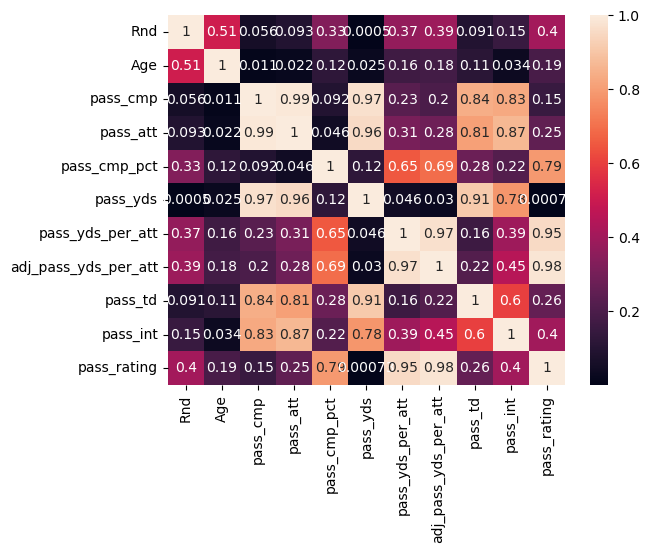

In [65]:
sns.heatmap(qb_num.corr().abs(),annot=True)

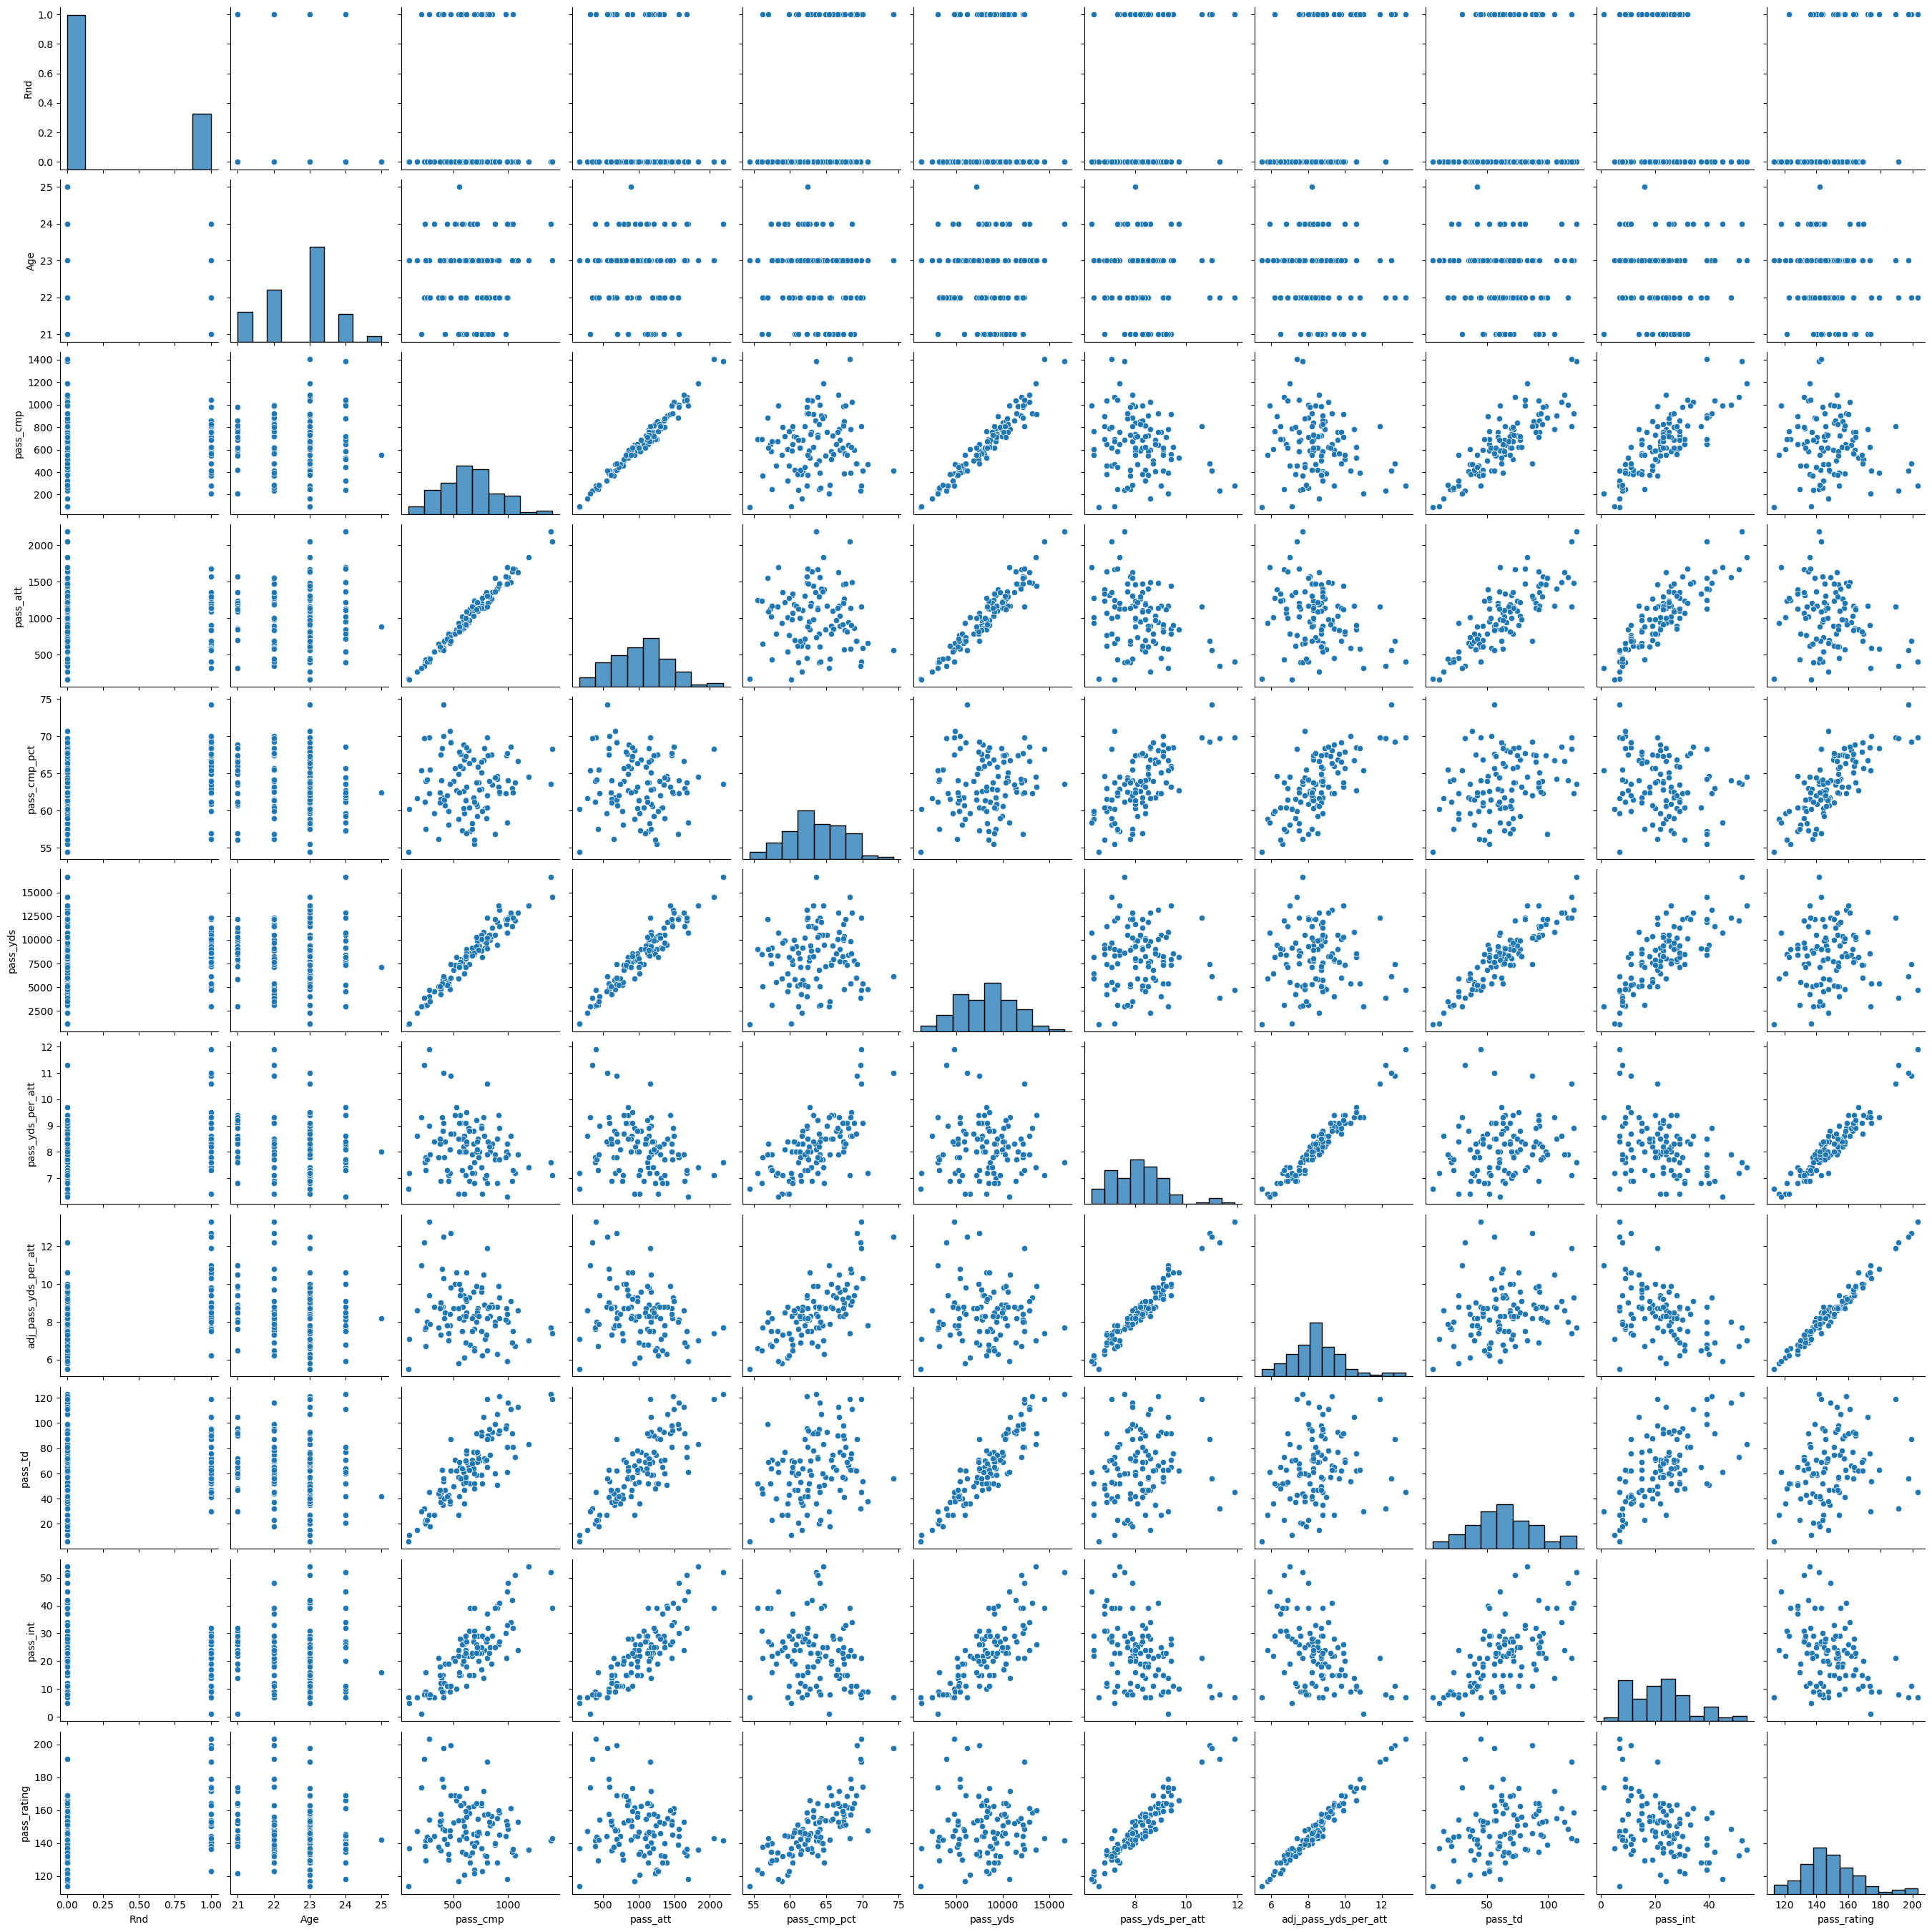

In [66]:
sns.pairplot(qb_num)

In [62]:
wr_num = wr.select_dtypes('float64')
wr_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

In [63]:
wr_num.groupby('Rnd').median()

Age    rec  rec_yds  rec_yds_per_rec  rec_td  rush_att  rush_yds  \
Rnd                                                                      
0.0  22.0  142.0   2138.5            14.70    16.0       8.0      46.0   
1.0  22.0  153.5   2414.0            15.75    22.0       6.0      31.5   

     rush_yds_per_att  rush_td  scrim_att  scrim_yds  scrim_yds_per_att  \
Rnd                                                                       
0.0              6.25      2.0      155.5     2239.5               14.2   
1.0              5.30      1.0      167.0     2509.5               15.4   

     scrim_td  
Rnd            
0.0      17.0  
1.0      23.5

<AxesSubplot:>

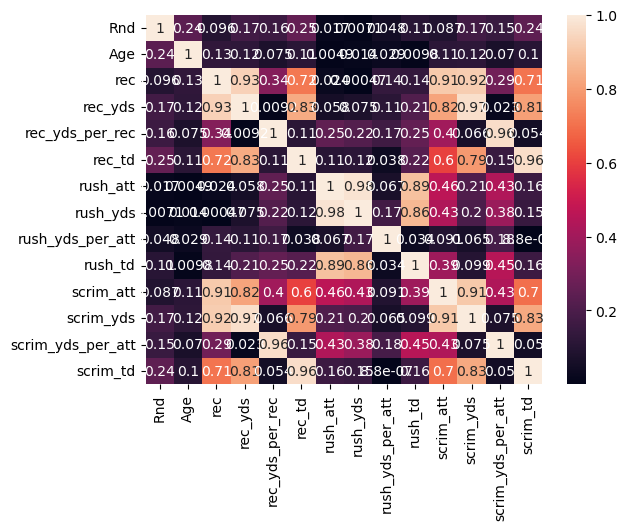

In [64]:
sns.heatmap(wr_num.corr().abs(),annot=True)

<AxesSubplot:xlabel='rec_td', ylabel='Count'>

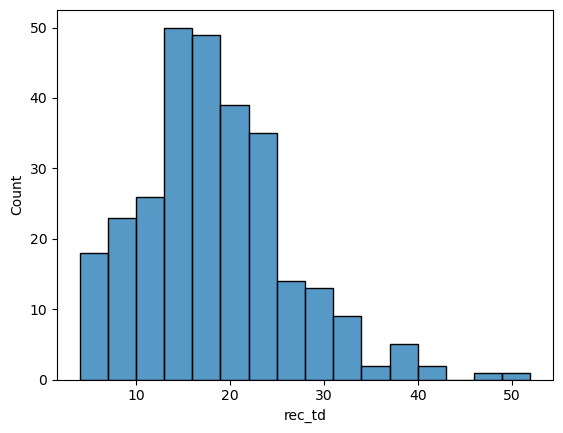

In [68]:
sns.histplot(wr_num.rec_td)

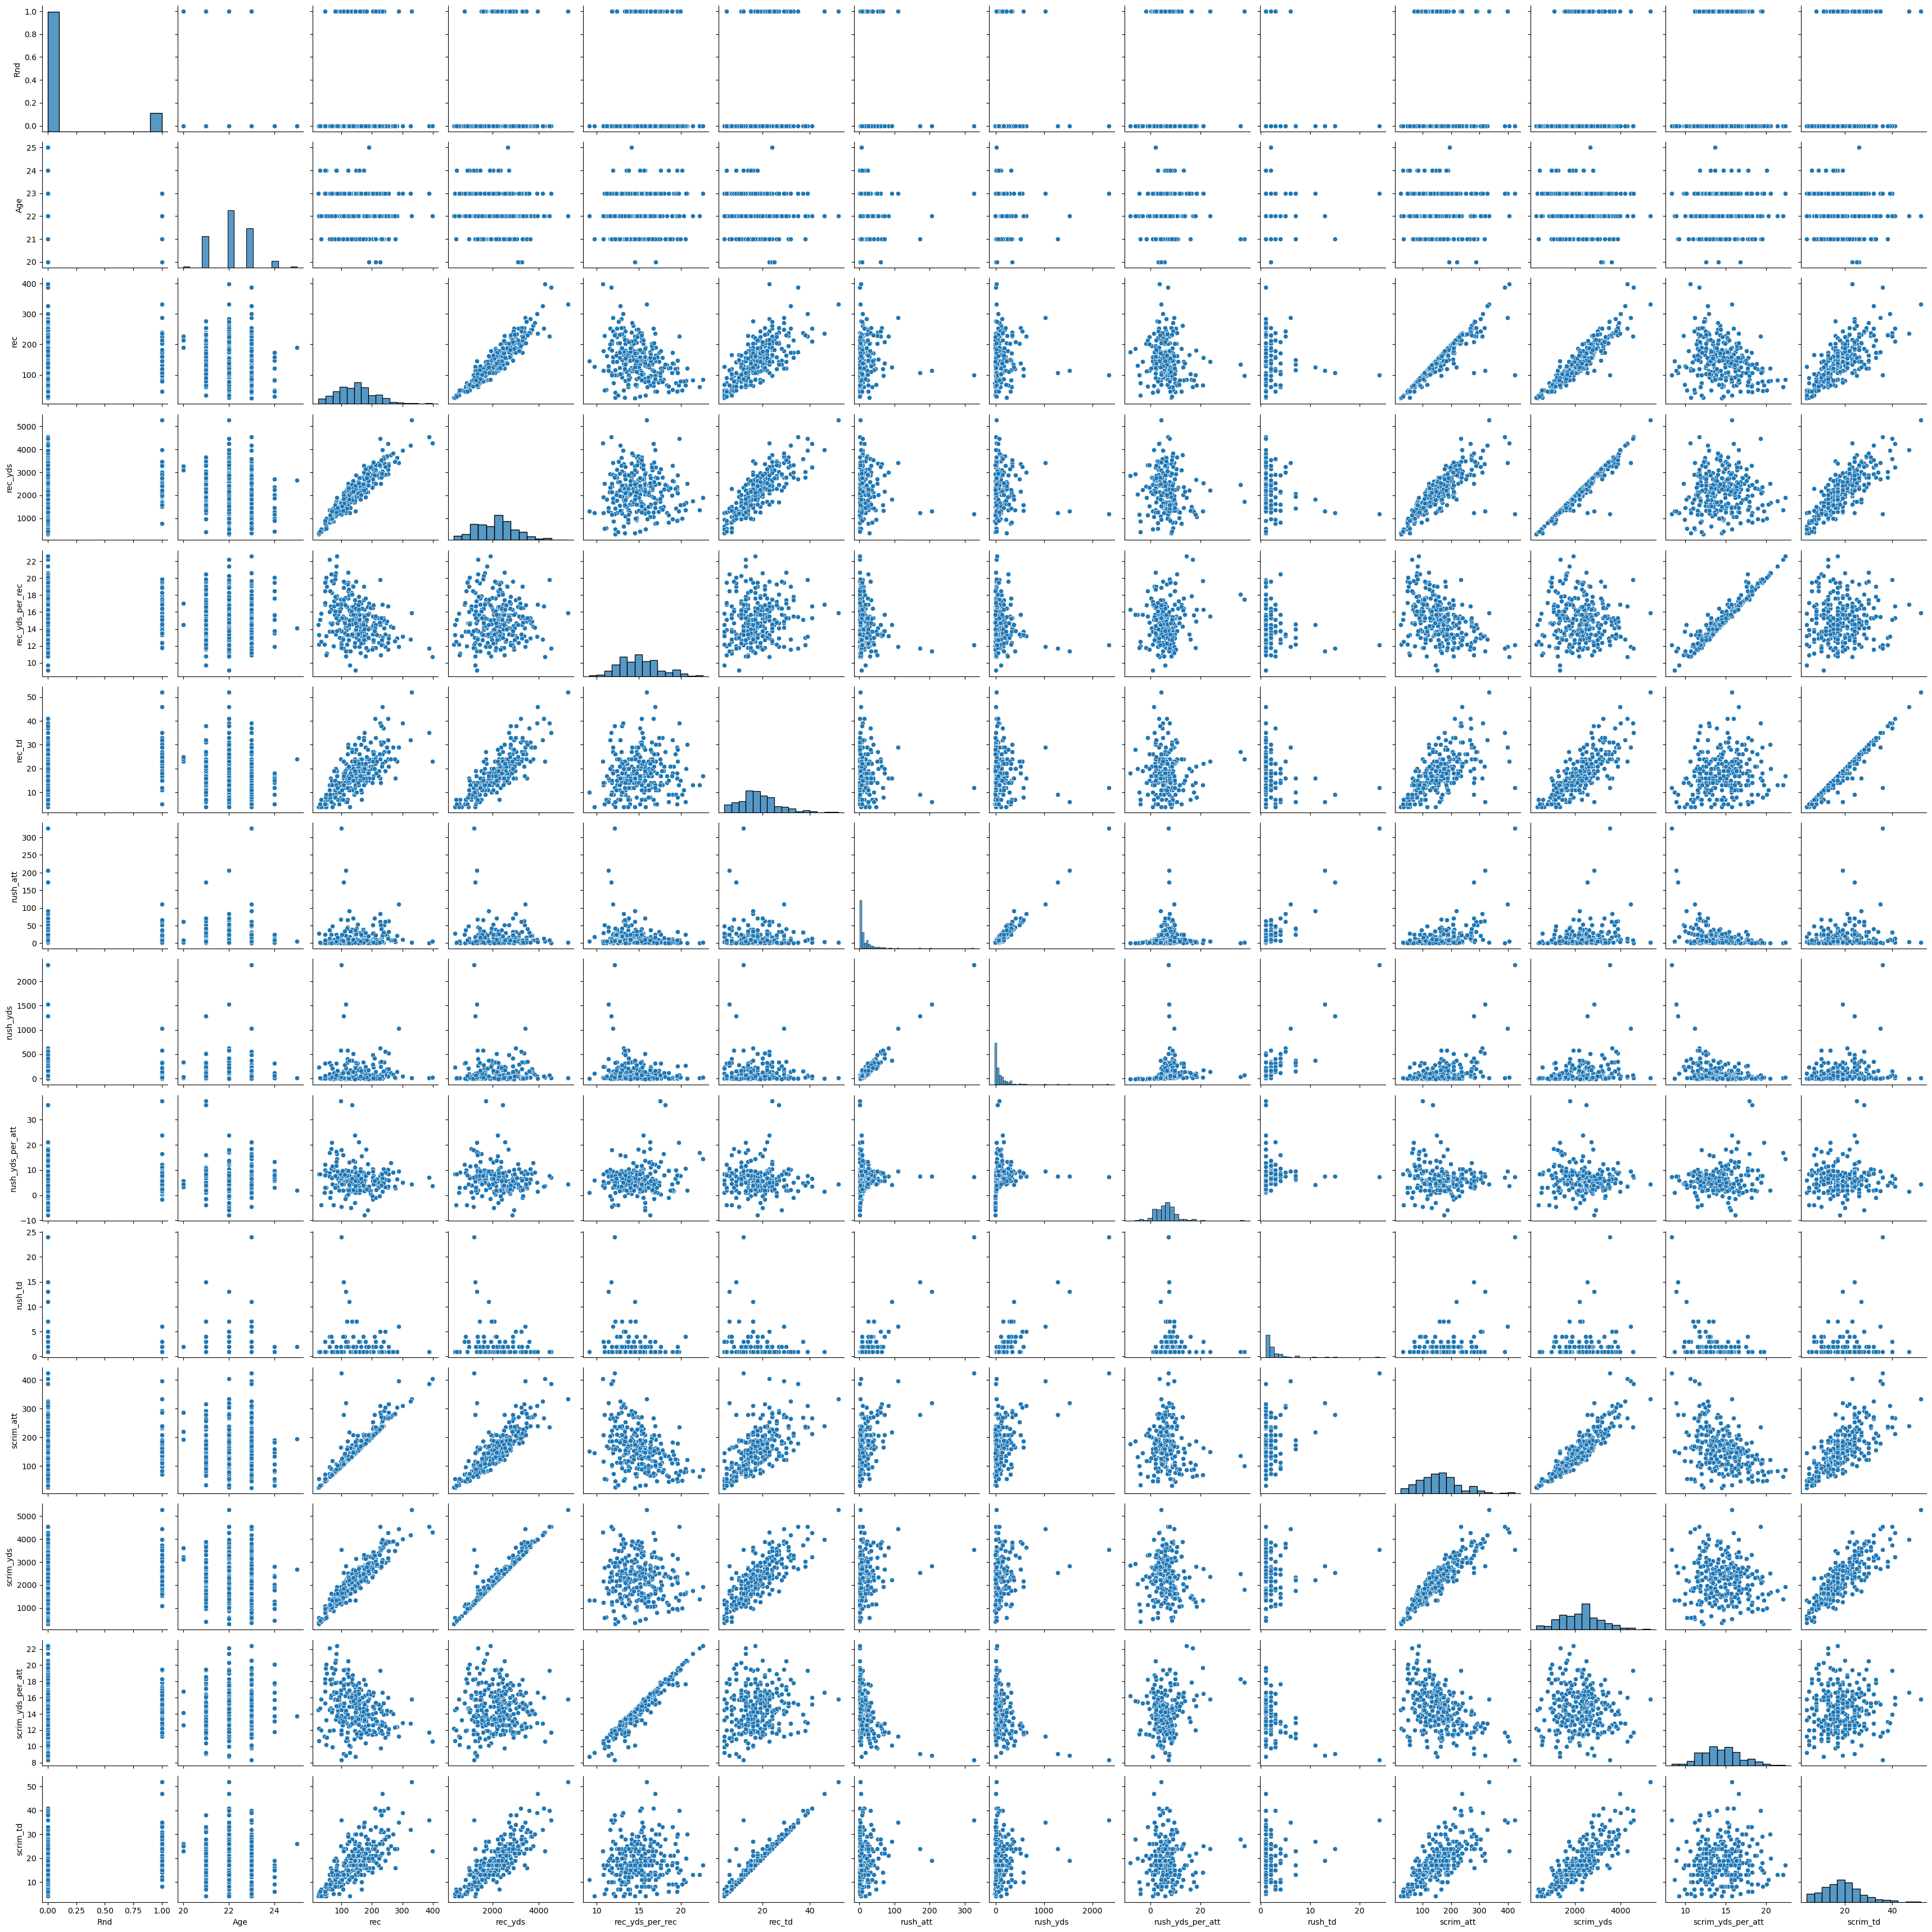

In [67]:
sns.pairplot(wr_num)

In [55]:
db_num = db.select_dtypes('float64')
db_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

In [56]:
db_num.groupby('Rnd').median()

Age  tackles_solo  tackles_assists  tackles_total  tackles_loss  sacks  \
Rnd                                                                            
0.0  23.0         101.0             47.0          153.0           6.5    0.5   
1.0  22.0         109.0             44.0          160.0           7.0    1.0   

     def_int  def_int_yds  def_int_yds_per_int  def_int_td  pass_defended  \
Rnd                                                                         
0.0      5.0         58.0                 13.4         0.0           11.0   
1.0      6.0         69.0                 12.5         0.0           16.0   

     fumbles_rec  fumbles_rec_yds  fumbles_rec_td  fumbles_forced  
Rnd                                                                
0.0          0.0              0.0             0.0             1.0  
1.0          1.0              1.0             1.0             1.0

<AxesSubplot:>

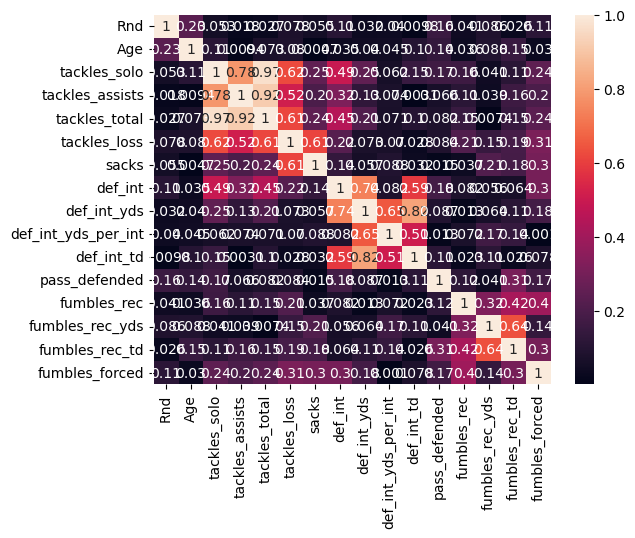

In [57]:
sns.heatmap(db_num.corr().abs(),annot=True)

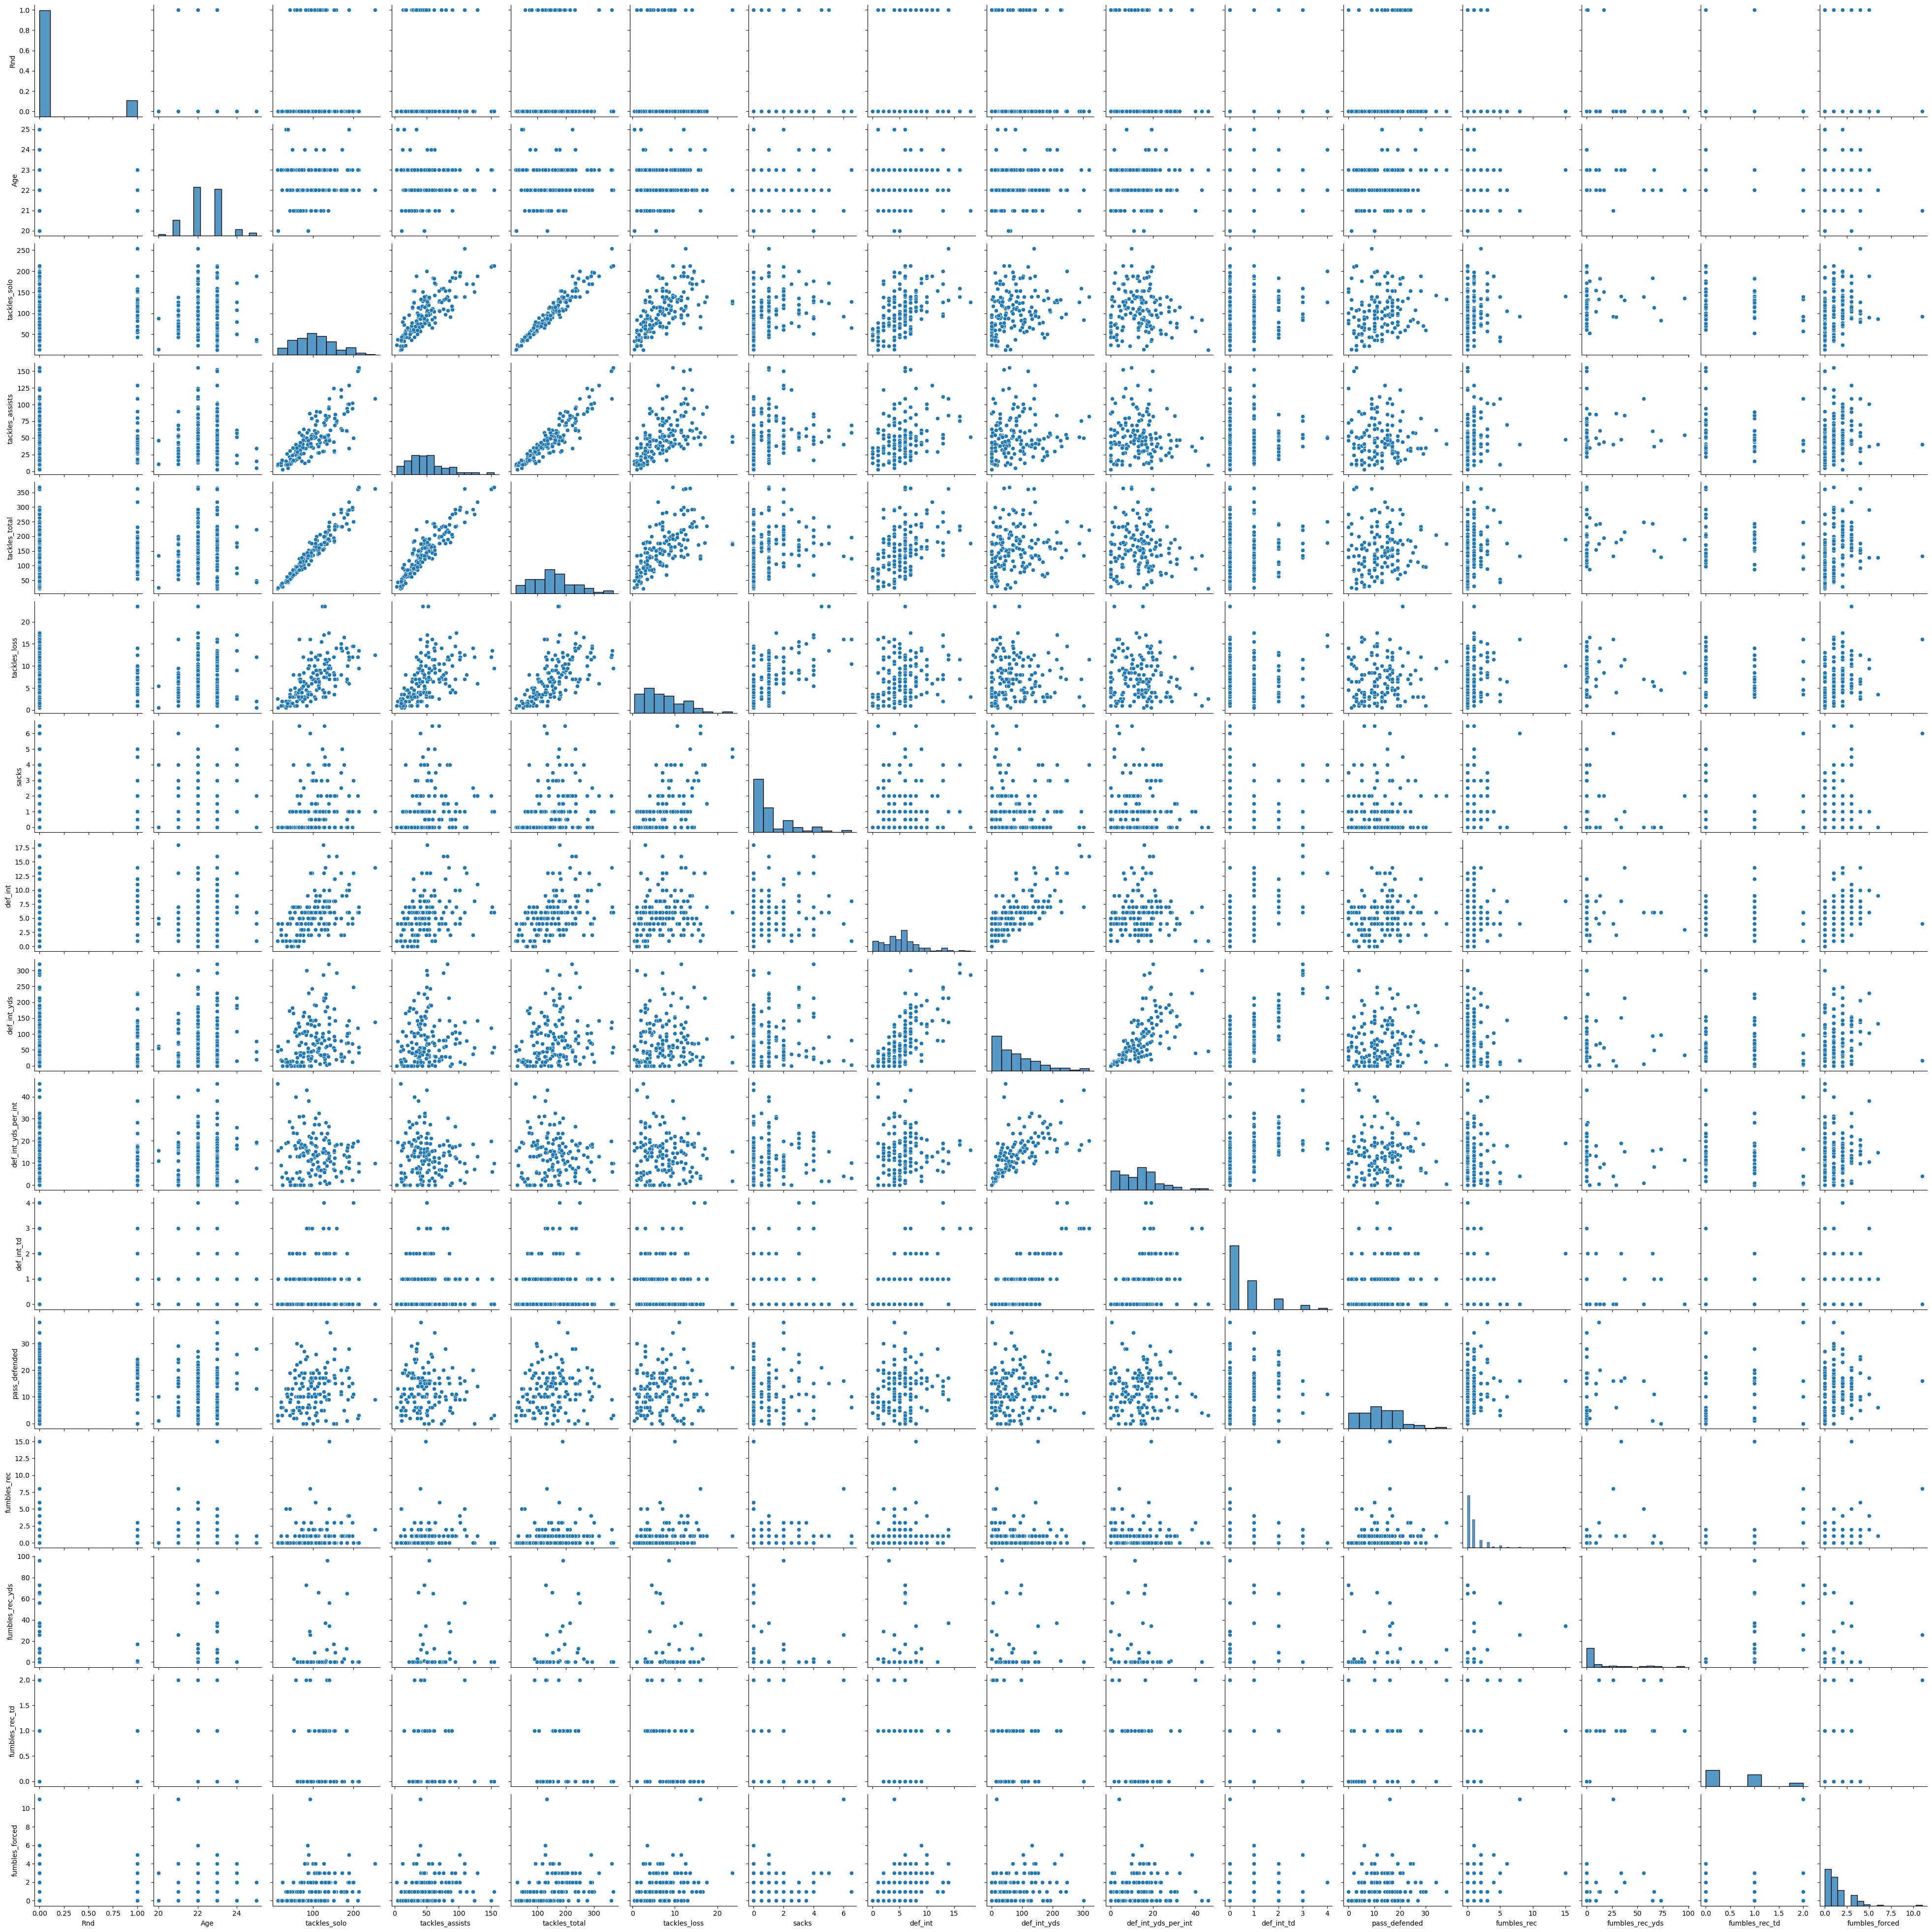

In [69]:
sns.pairplot(db_num)

In [52]:
cb_num = cb.select_dtypes('float64')
cb_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

In [53]:
cb_num.groupby('Rnd').median()

Age  tackles_solo  tackles_assists  tackles_total  tackles_loss  sacks  \
Rnd                                                                            
0.0  22.0          84.0             30.0          115.0           5.0    0.5   
1.0  21.0          67.5             27.0           93.5           4.0    0.0   

     def_int  def_int_yds  def_int_yds_per_int  def_int_td  pass_defended  \
Rnd                                                                         
0.0      5.0         42.0                  8.8         0.0           19.0   
1.0      6.0         59.5                  9.9         0.0           18.0   

     fumbles_rec  fumbles_rec_yds  fumbles_rec_td  fumbles_forced  
Rnd                                                                
0.0          1.0              0.0             1.0             1.0  
1.0          1.0              7.0             1.0             1.0

<AxesSubplot:>

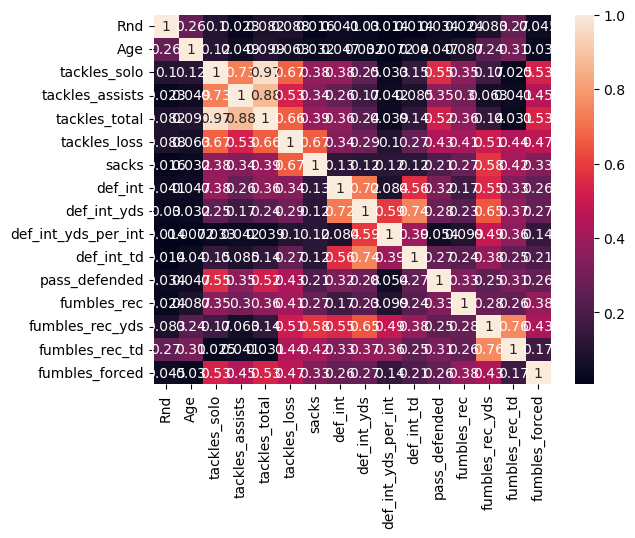

In [54]:
sns.heatmap(cb_num.corr().abs(),annot=True)

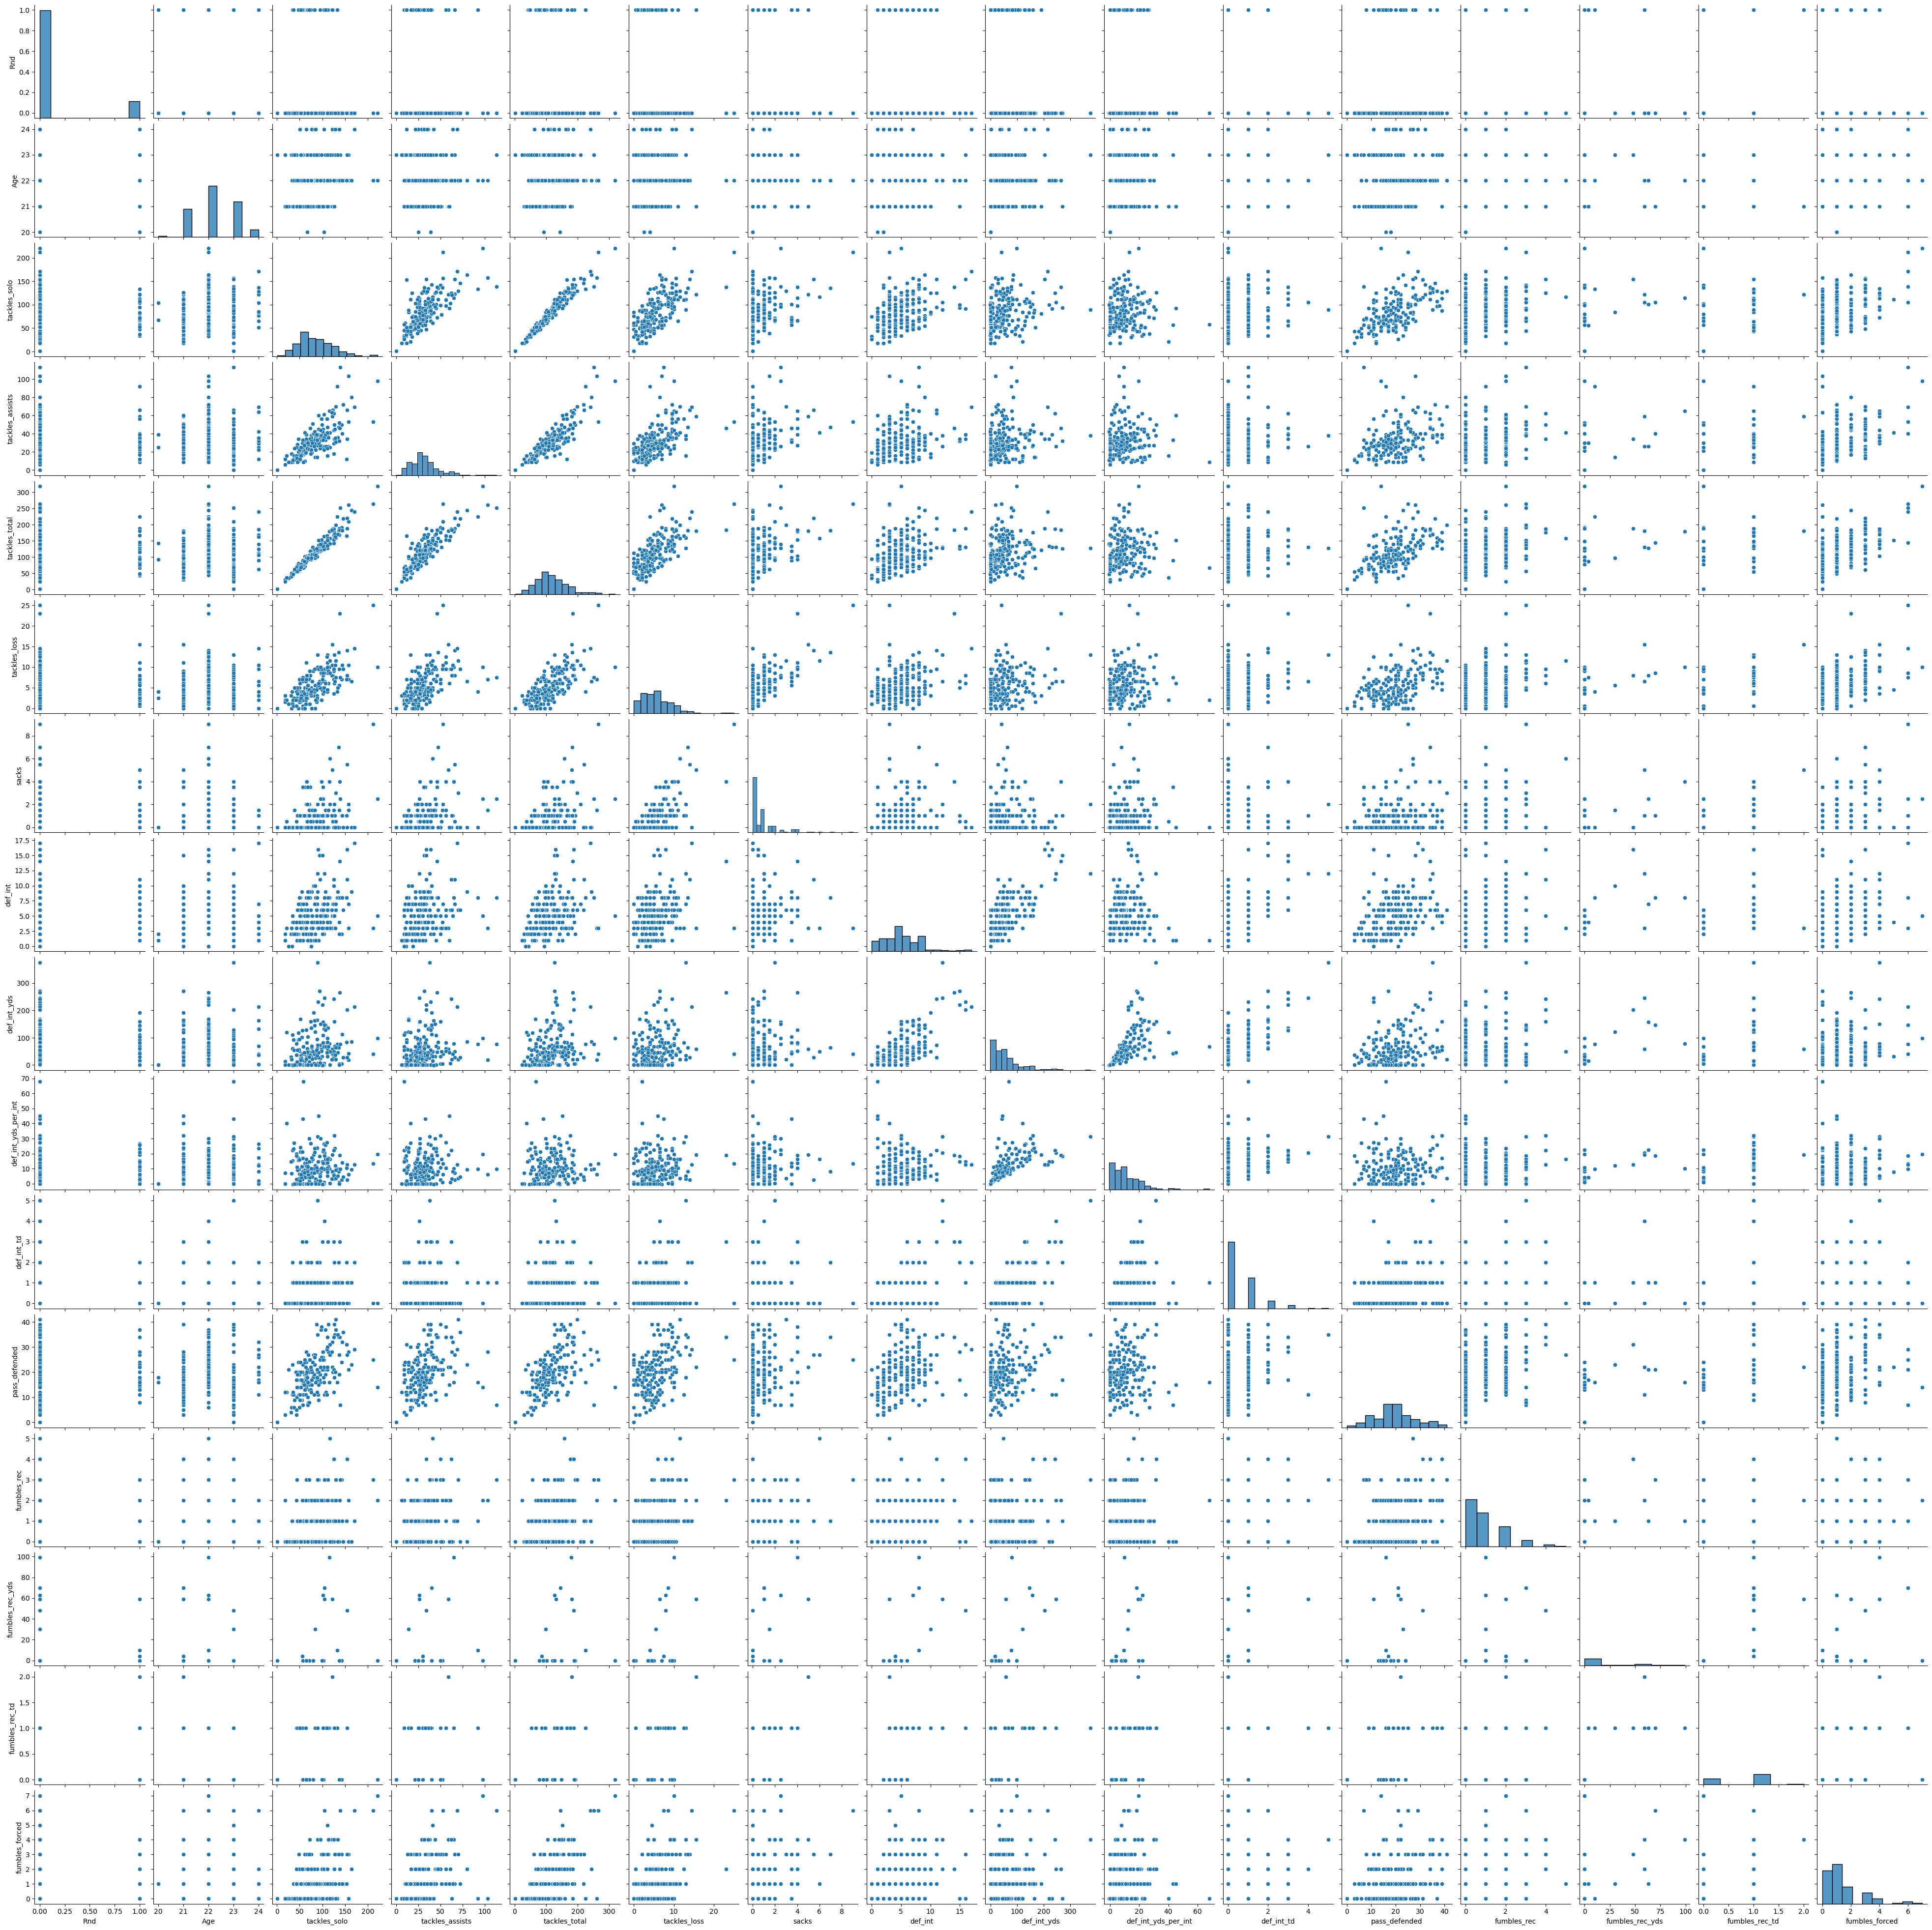

In [70]:
sns.pairplot(cb_num)

In [51]:
dt_num = dt.select_dtypes('float64')
dt_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

In [50]:
dt_num.groupby('Rnd').median()

Age  tackles_solo  tackles_assists  tackles_total  tackles_loss  sacks  \
Rnd                                                                            
0.0  23.0          51.0             51.0          107.0          19.0    7.5   
1.0  22.0          50.0             59.0          107.0          19.5    7.0   

     def_int  def_int_yds  def_int_yds_per_int  def_int_td  pass_defended  \
Rnd                                                                         
0.0      0.0          0.0                  7.5         0.0            2.0   
1.0      0.0          0.0                  0.0         0.0            3.0   

     fumbles_rec  fumbles_rec_yds  fumbles_rec_td  fumbles_forced  
Rnd                                                                
0.0          1.0              0.0             0.0             1.0  
1.0          1.0              0.0             0.0             1.0

<AxesSubplot:>

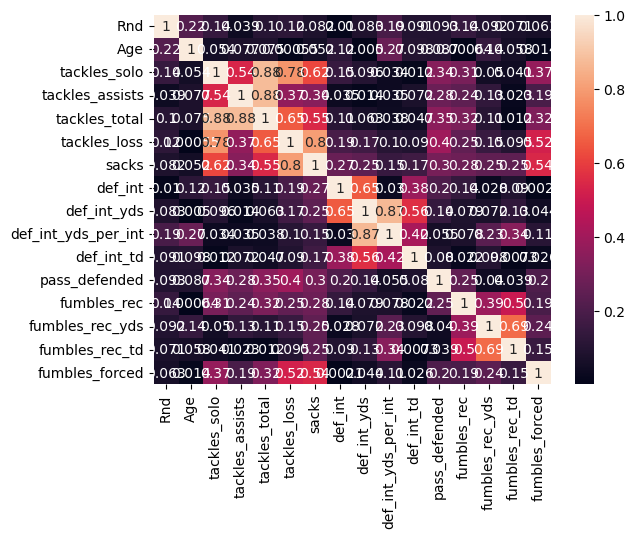

In [49]:
sns.heatmap(dt_num.corr().abs(),annot=True)

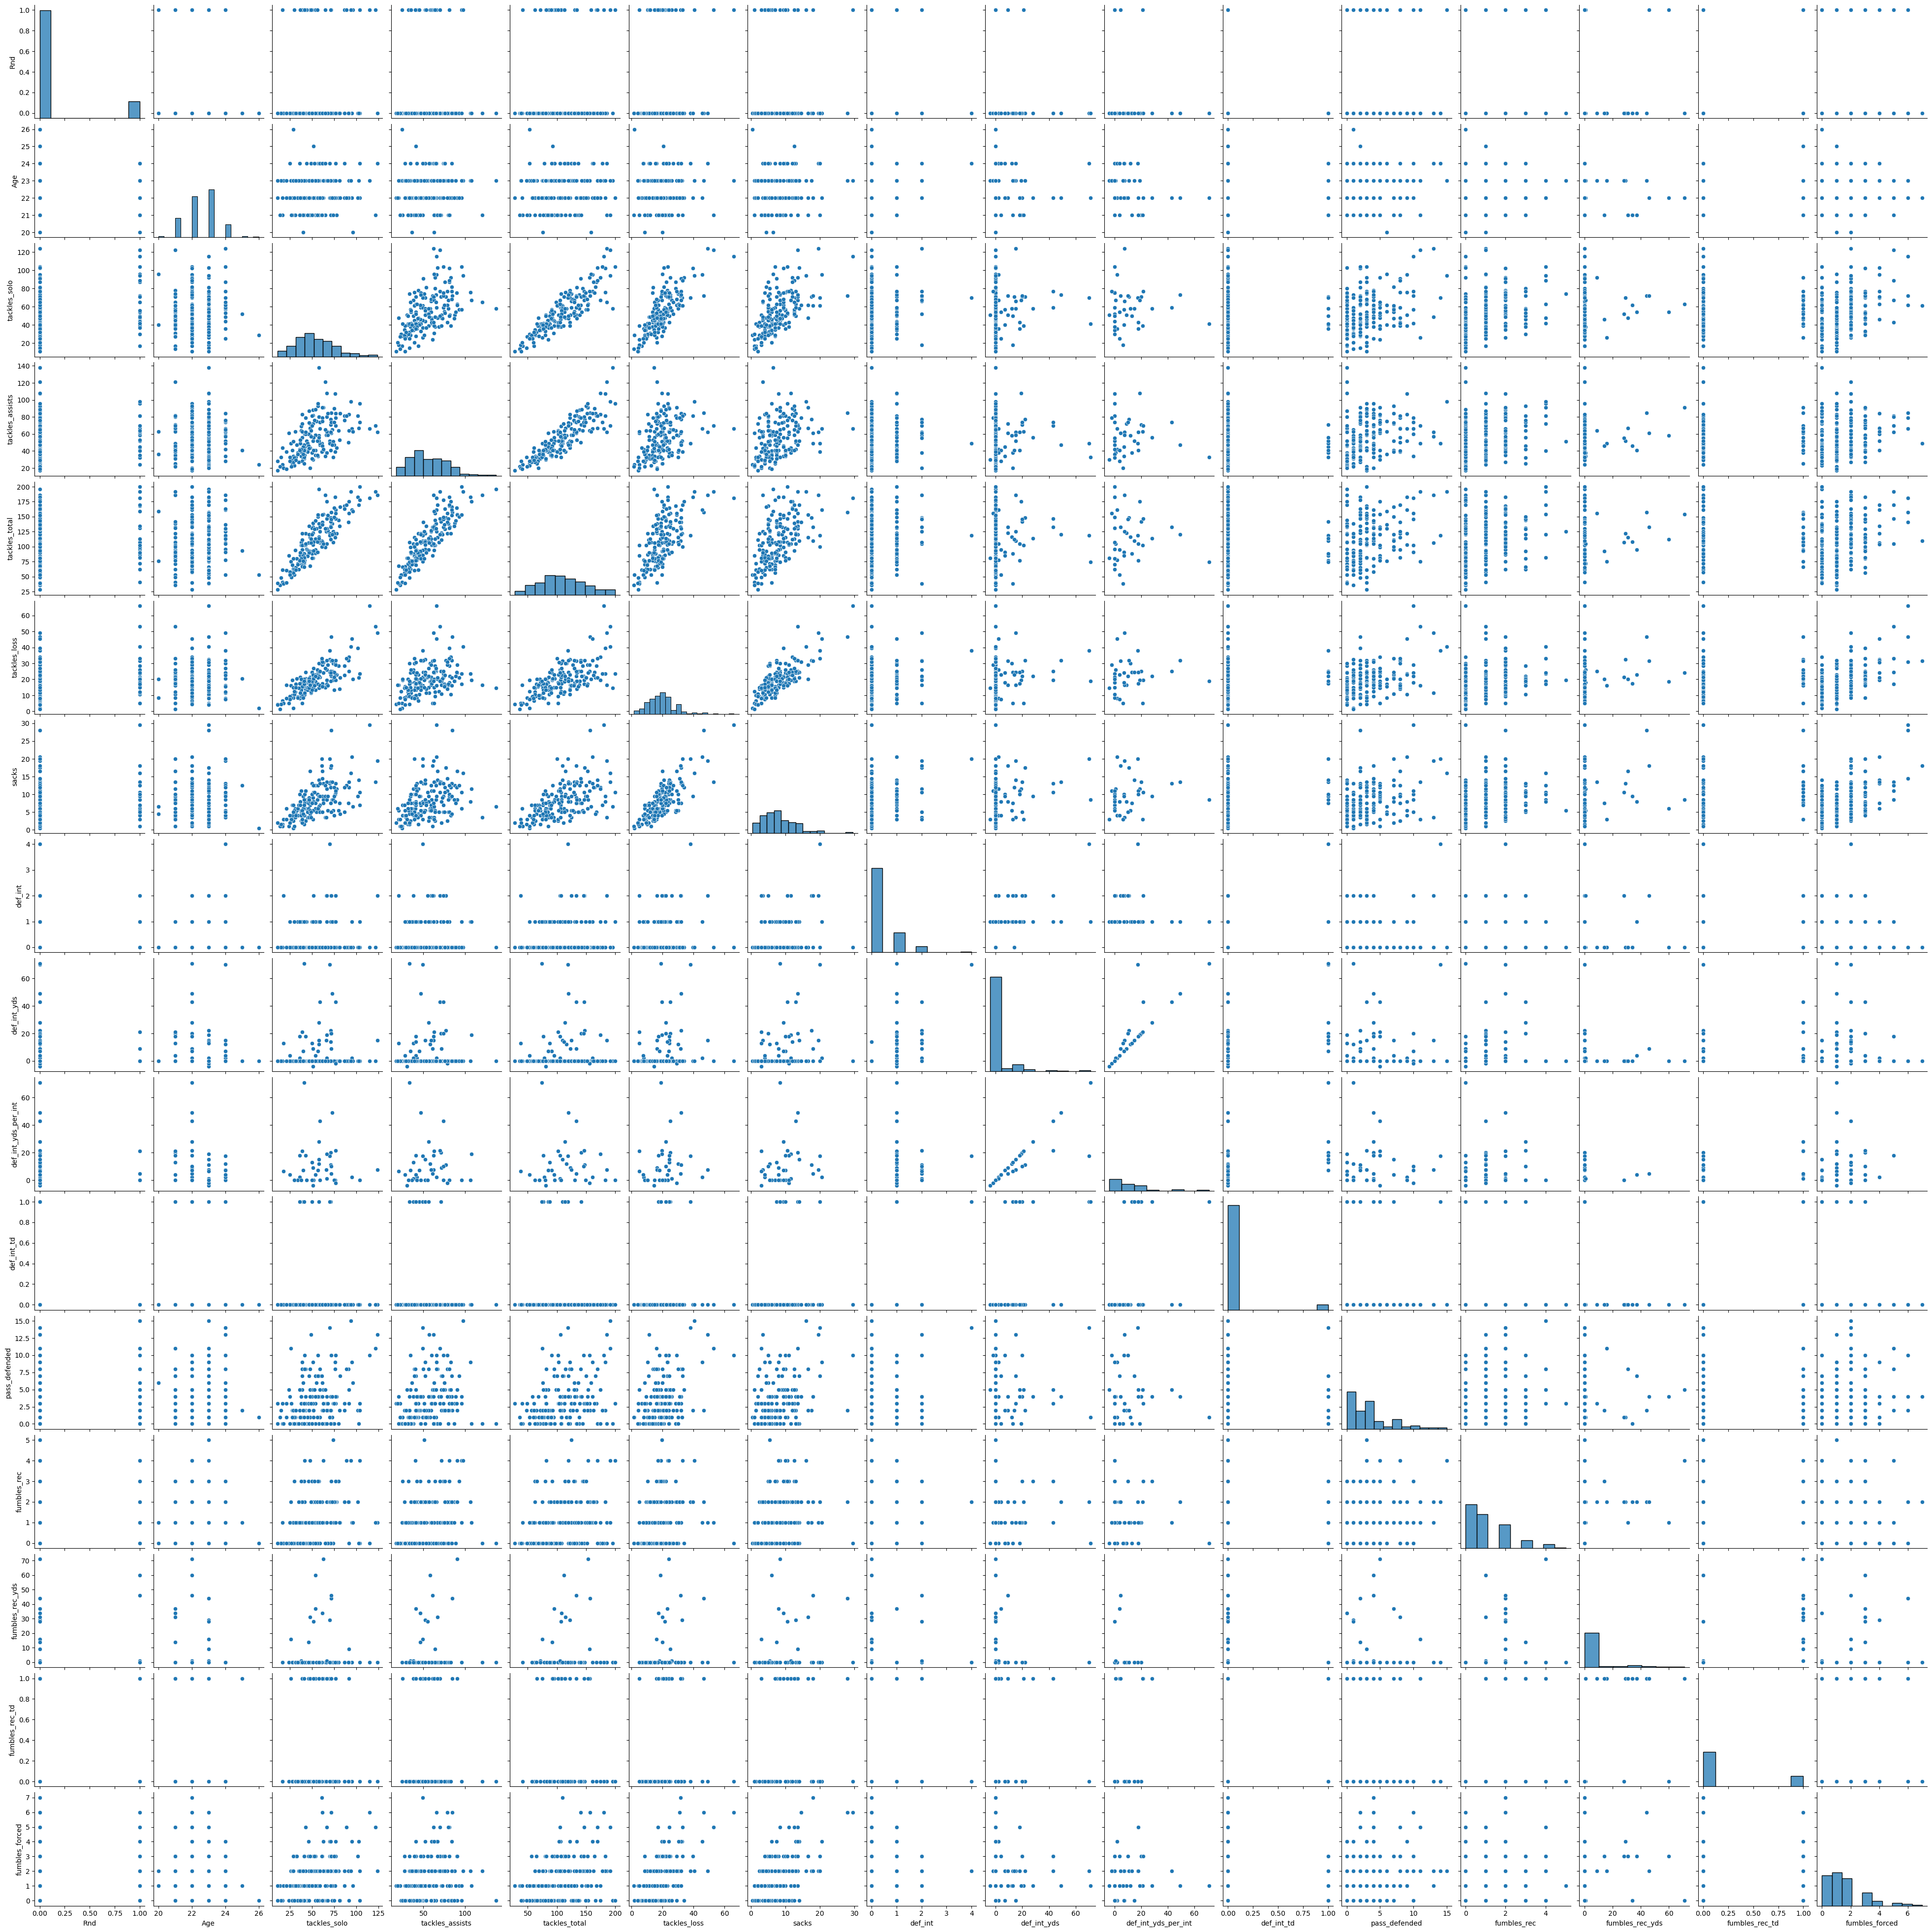

In [71]:
sns.pairplot(dt_num)

In [32]:
de_num = de.select_dtypes('float64')

In [33]:
de_num.drop(['Draft_Yr','Pick','To','entry_year','draft_number'],axis=1,inplace=True)

In [ ]:
de_num.groupby('Rnd').median()

<AxesSubplot:>

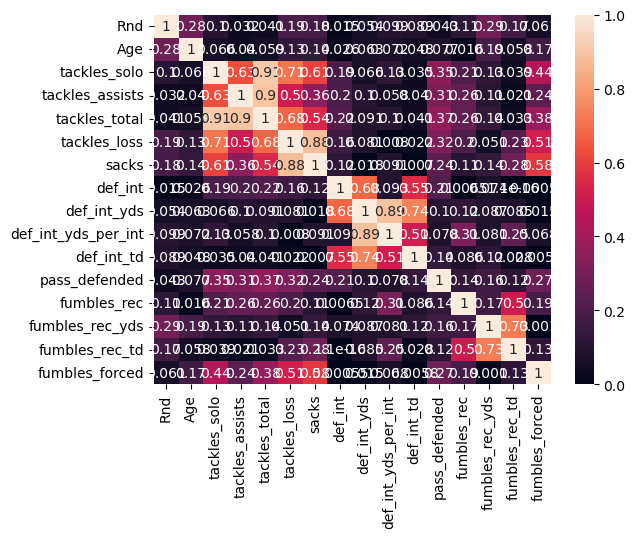

In [34]:
sns.heatmap(de_num.corr().abs(),annot=True)

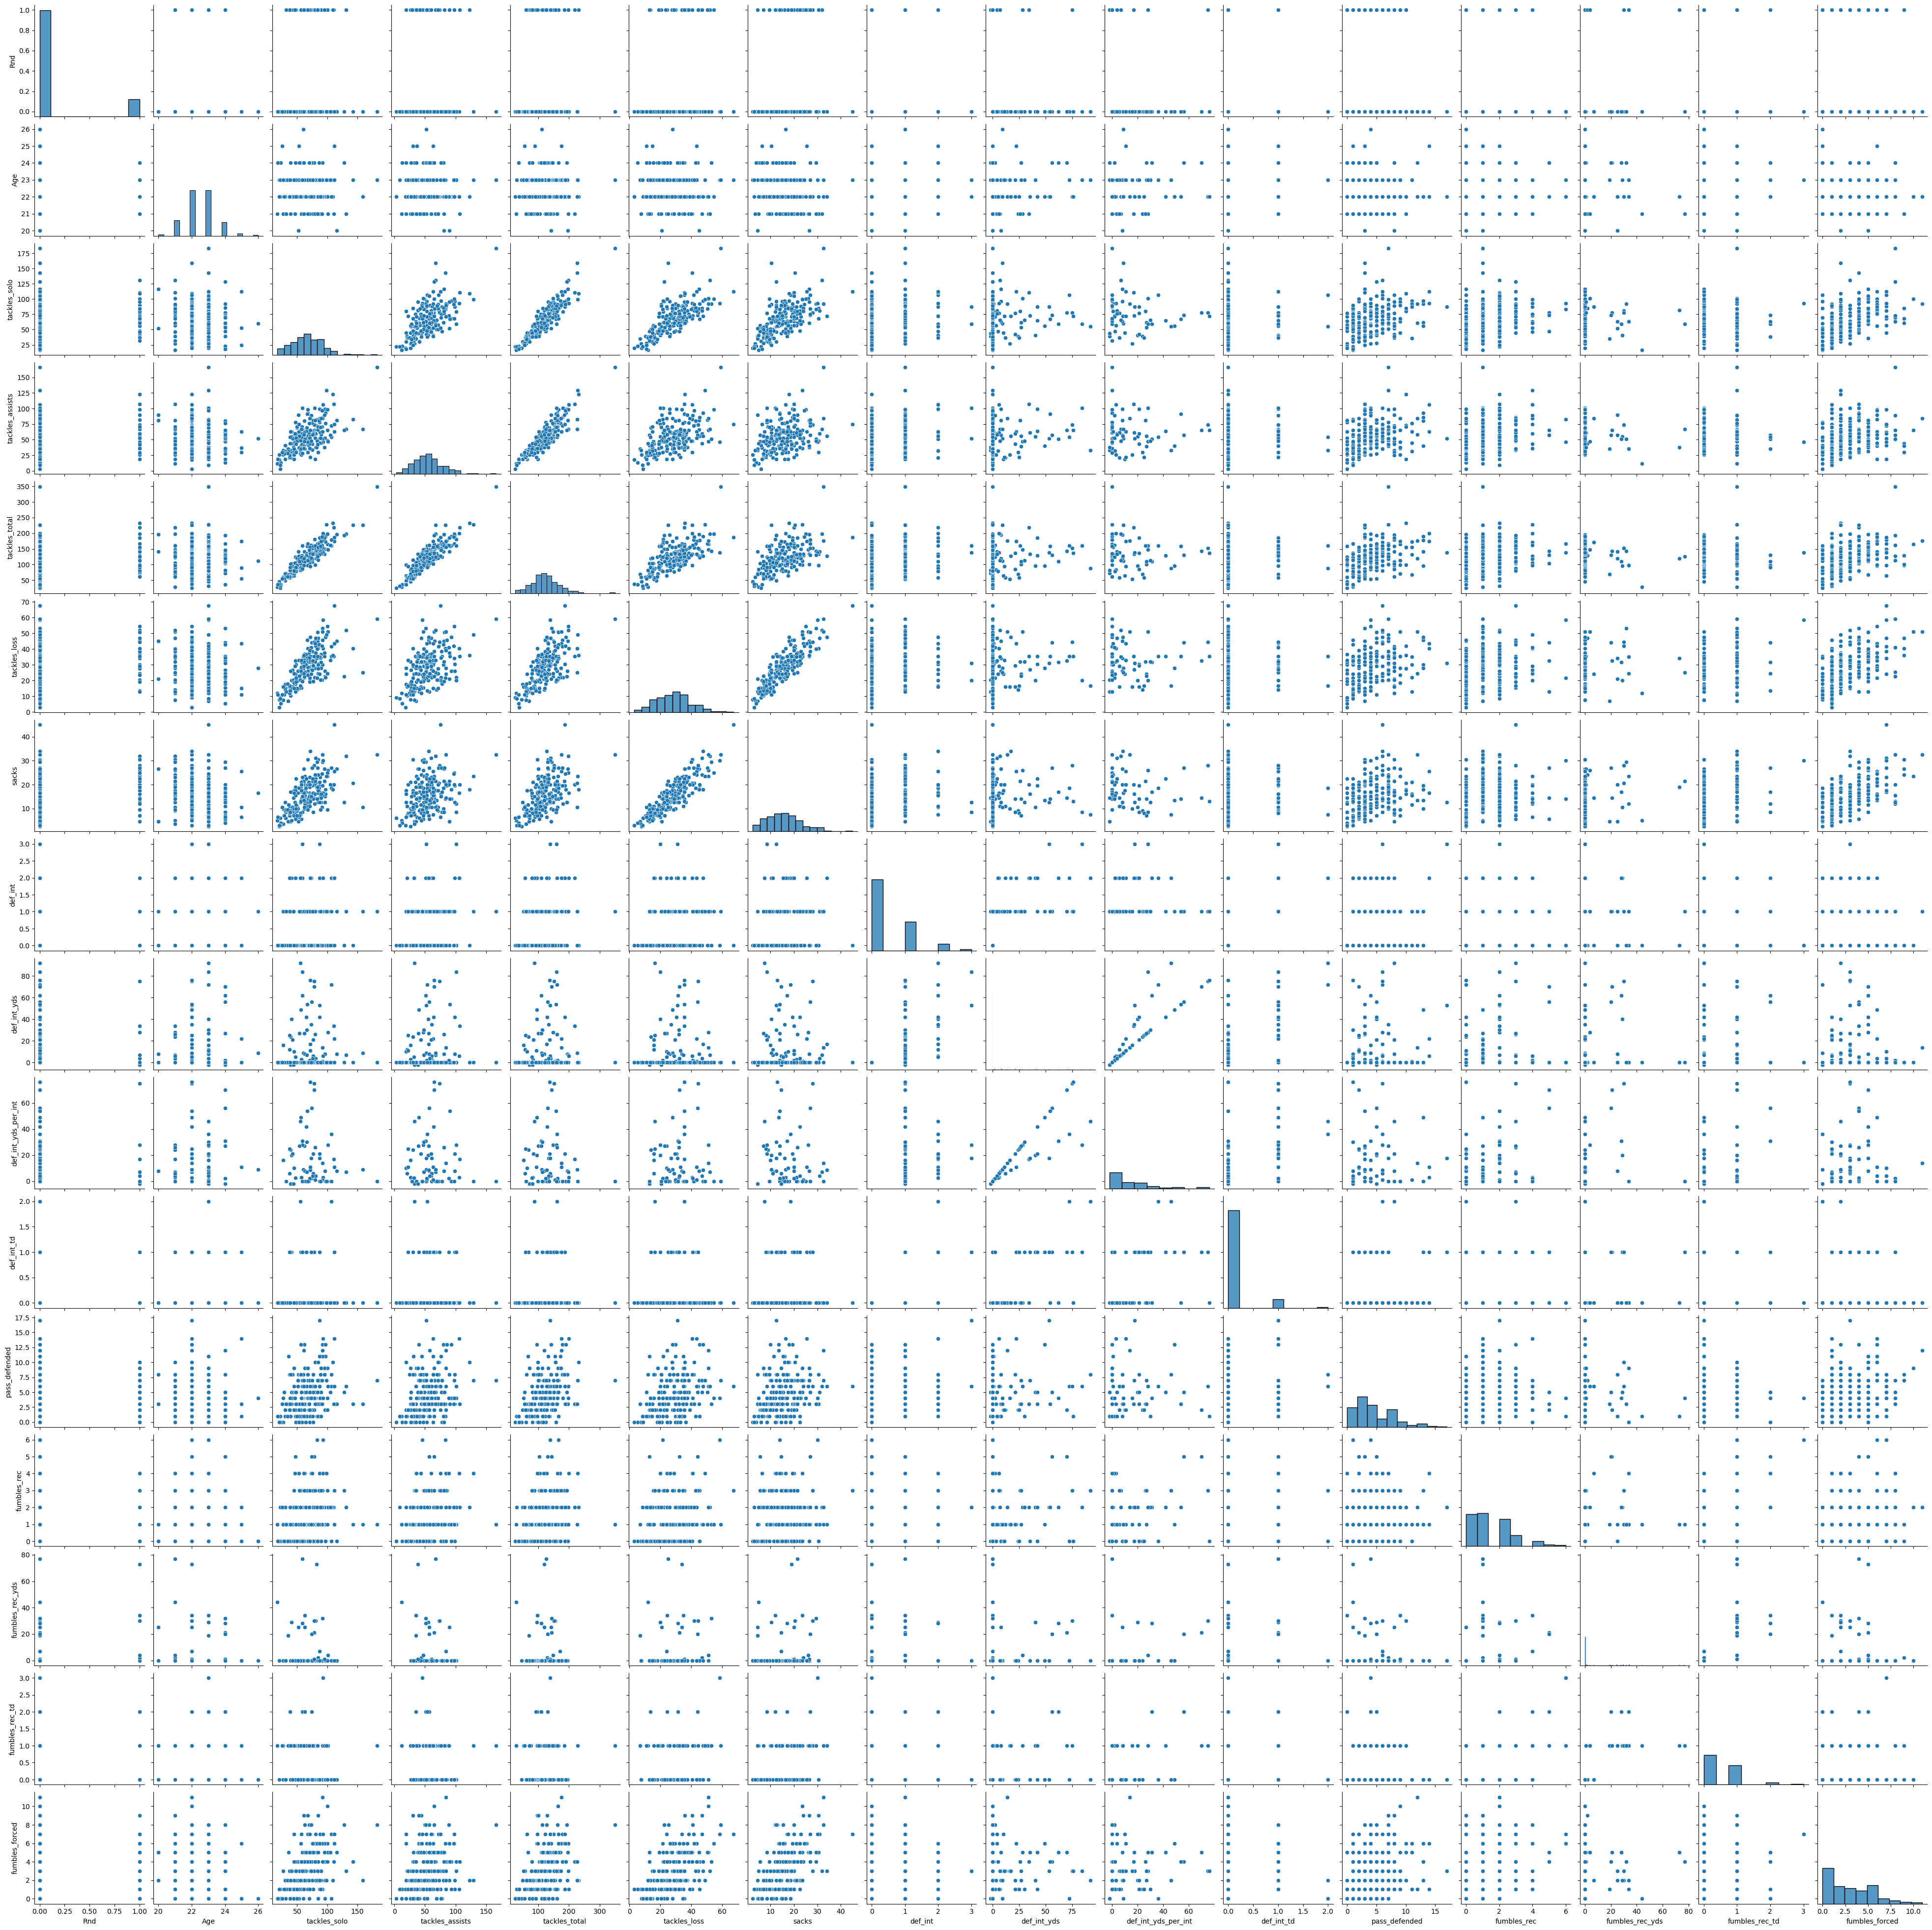

In [72]:
sns.pairplot(de_num)

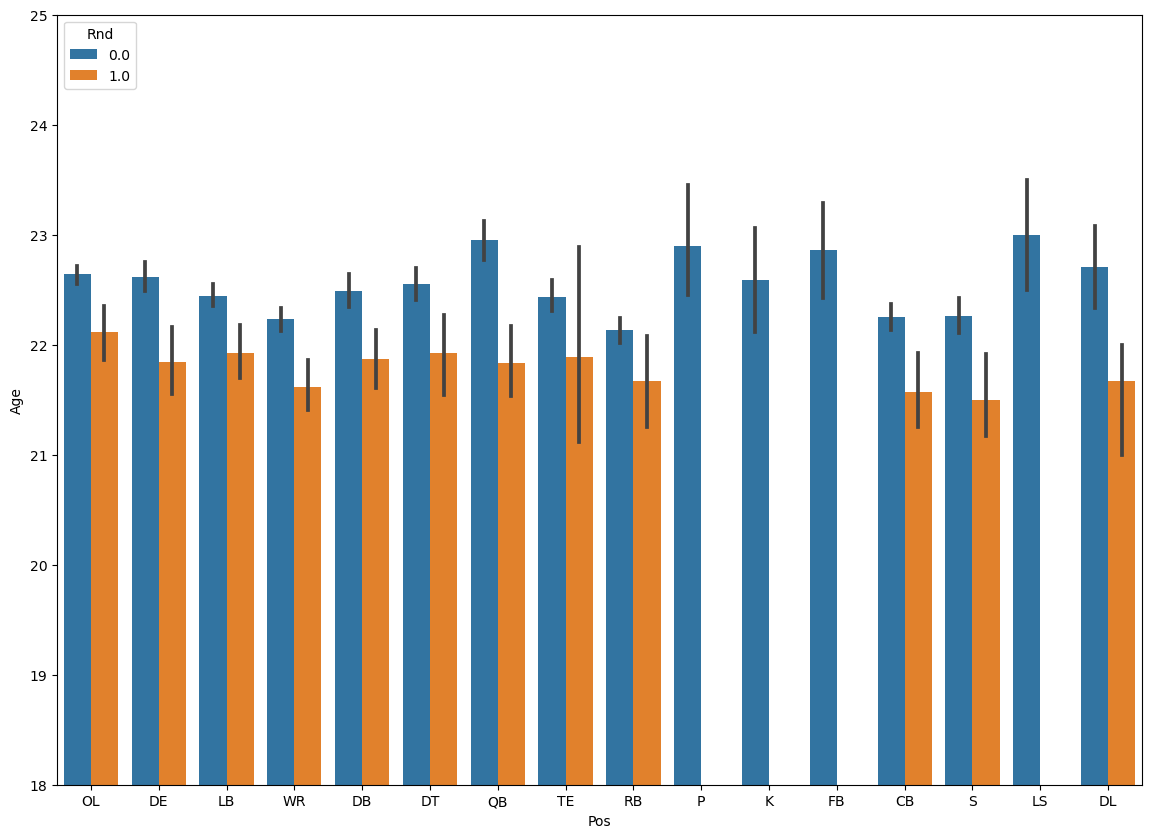

In [38]:
plt.figure(figsize=(14,10))
sns.barplot(x=df.Pos,y=df.Age,hue=df.Rnd)
plt.ylim(18,25);

In [39]:
df.height.value_counts()

6-3     329
6-4     299
6-1     270
6-2     267
6-5     257
6-0     228
5-11    184
6-6     148
5-10    108
6-7      58
5-9      55
5-8      21
6-8      15
77       12
73       11
74       11
75        9
72        8
6-9       5
71        3
70        3
5-7       3
76        2
78        2
5-6       2
69        1
79        1
Name: height, dtype: int64

In [40]:
df.height[df.height.str.contains('-')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
df[df.height.isna()]